# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object

html = browser.html
bsobject = soup(html, 'html.parser')

In [6]:
# Extract all rows of data

HTML_table = bsobject.find('tbody')

Rows = HTML_table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
id = []
t_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

# Loop through the scraped data to create a list of rows

for _ in Rows:
    id.append(_.find_all('td')[0].text)
    t_date.append(_.find_all('td')[1].text)
    sol.append(_.find_all('td')[2].text)
    ls.append(_.find_all('td')[3].text)
    month.append(_.find_all('td')[4].text)
    min_temp.append(_.find_all('td')[5].text)
    pressure.append(_.find_all('td')[6].text)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
SuperDict = {"ID" : id, 'Terrestrial_Date' : t_date, 'Sol' : sol, 'LS' : ls, 'Mars_Months' : month, 'Min_Temp' : min_temp, 'Pressure' : pressure}
MarsScrapePD = pd.DataFrame(data = SuperDict)



### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
MarsScrapePD.head()


,ID,Terrestrial_Date,Sol,LS,Mars_Months,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
MarsScrapePD['Pressure'] = pd.to_numeric(MarsScrapePD.Pressure)
MarsScrapePD['Min_Temp'] = pd.to_numeric(MarsScrapePD.Min_Temp)
MarsScrapePD['Mars_Months'] = pd.to_numeric(MarsScrapePD.Mars_Months)
MarsScrapePD['LS'] = pd.to_numeric(MarsScrapePD.LS)
MarsScrapePD['Terrestrial_Date'] = pd.to_datetime(MarsScrapePD.Terrestrial_Date)
MarsScrapePD['Sol'] = pd.to_numeric(MarsScrapePD.Sol)


In [11]:

Maths = MarsScrapePD['Mars_Months'].max()

print('According to our dataset, there are ' + str(Maths) + ' Months in one mars year.')


According to our dataset, there are 12 Months in one mars year.


In [12]:

UniqueDays = len(pd.unique(MarsScrapePD['Sol']))
print('This Dataset has ' + str(UniqueDays) + " Martian days'(sol) worth of data.")

This Dataset has 1867 Martian days'(sol) worth of data.


In [13]:
mTemp = {}
for _ in range(0, int(Maths)):
    mTemp[_] = MarsScrapePD[MarsScrapePD['Mars_Months'] == (1+_)]

MonthTempAvg = []
for _ in range(0, int(Maths)):
    MonthTempAvg.append(mTemp[_]['Min_Temp'].mean())

print('The average low temperature by month is ' + str(sum(MonthTempAvg)/len(MonthTempAvg)))

The average low temperature by month is -75.50100255873393


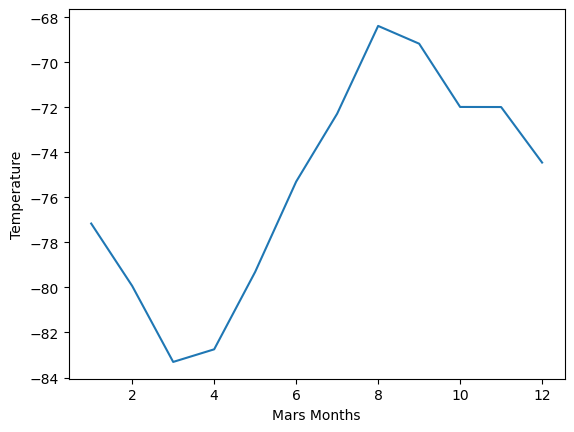

In [14]:
# Plot the average pressure by month
months = []
for _ in range(1, 13):
    months.append(_)

plt.plot(months, MonthTempAvg)
plt.xlabel('Mars Months')
plt.ylabel('Temperature')
plt.show()

In [15]:
x = min(MonthTempAvg)
ColdMonth = MonthTempAvg.index(x)

#Hottest Month
y = max(MonthTempAvg)
HotMonth = MonthTempAvg.index(y)

print('The Coldest month is: month', ColdMonth,'at', x,". The Hottest month is: month", HotMonth, 'at', y, '.')

The Coldest month is: month 2 at -83.30729166666667 . The Hottest month is: month 7 at -68.38297872340425 .


In [16]:
mPres = {}
for _ in range(0, int(Maths)):
    mPres[_] = MarsScrapePD[MarsScrapePD['Mars_Months'] == (1+_)]
MonthPresAvg = []
for _ in range(0, int(Maths)):
    MonthPresAvg.append(mPres[_]['Pressure'].mean())

MonthPresAvg


[862.4885057471264,
 889.4550561797753,
 877.3229166666666,
 806.3298969072165,
 748.5570469798657,
 745.0544217687075,
 795.1056338028169,
 873.8297872340426,
 913.3059701492538,
 887.3125,
 857.0144927536232,
 842.156626506024]

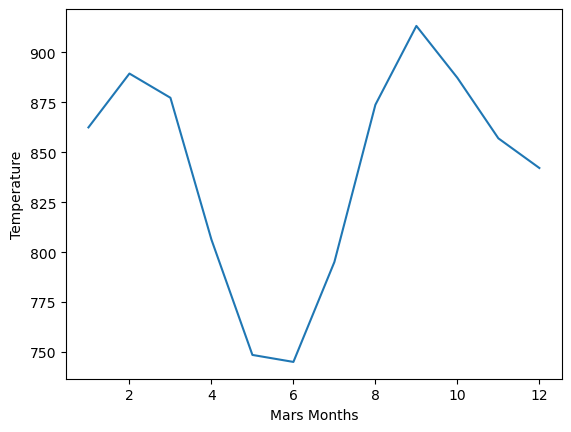

In [17]:
plt.plot(months, MonthPresAvg)
plt.xlabel('Mars Months')
plt.ylabel('Temperature')
plt.show()

In [18]:
x = min(MonthPresAvg)
LPresMonth = MonthPresAvg.index(x)
y = max(MonthPresAvg)
HPresMonth = MonthPresAvg.index(y)
print('The Lowest Pressure month is: month', LPresMonth,'at', x,". The Highest Pressure month is: month", HPresMonth, 'at', y, '.')

The Lowest Pressure month is: month 5 at 745.0544217687075 . The Highest Pressure month is: month 8 at 913.3059701492538 .


        ID Terrestrial_Date   Sol  LS  Mars_Months  Min_Temp  Pressure
304    320       2013-08-01   351   0            1     -75.0     853.0
305    319       2013-08-02   352   0            1     -77.0     854.0
925    954       2015-06-19  1019   0            1     -81.0     849.0
926    938       2015-06-20  1020   0            1     -63.0     832.0
1579  1606       2017-05-06  1688   0            1     -76.0     840.0
1580  1610       2017-05-07  1689   0            1     -75.0     840.0


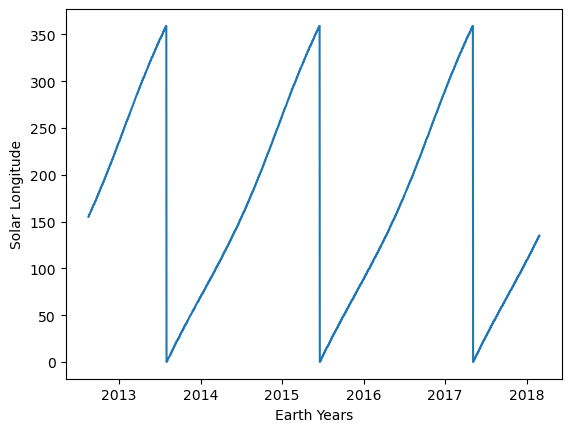

We can see the Solar Longitude is at 0 every 668 days. This shows in the plot, with a repeating time period that looks slightly less than 2 years. 


In [29]:
print(MarsScrapePD[MarsScrapePD['LS'] == 0])
plt.plot(MarsScrapePD['Terrestrial_Date'], MarsScrapePD['LS'])
plt.xlabel('Earth Years')
plt.ylabel('Solar Longitude')
plt.show()

a = MarsScrapePD.iloc[925, 2] - MarsScrapePD.iloc[304, 2]
print('We can see the Solar Longitude is at 0 every ' + str(a) + ' days. This shows in the plot, with a repeating time period that looks slightly less than 2 years. ')


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
MarsScrapePD.to_csv('../CSV_output/CSVData.csv')


In [32]:
browser.quit()